cuda
512


<IPython.core.display.Javascript object>


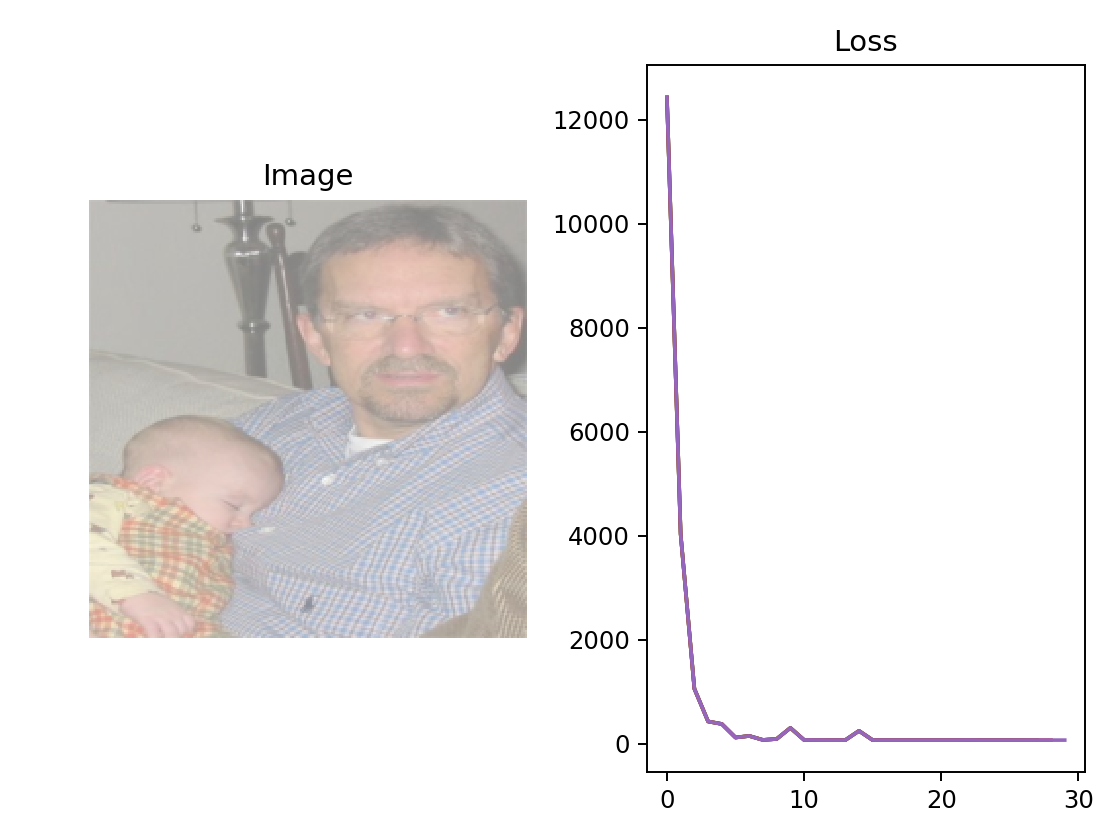

Start/Continue training from epoch 26


/opt/conda/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 27 (Time: 240.94s)
Epoch 28 (Time: 254.37s)
Epoch 29 (Time: 259.42s)
Epoch 30 (Time: 258.46s)
Finish training for 30 epochs


In [1]:
%matplotlib notebook

import os
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as td
import torch.nn.functional as F
import torchvision as tv
from PIL import Image
import nntools as nt
import matplotlib.pyplot as plt
from dataloader import VOCDataset, myimshow
import model
class statsmanager(nt.StatsManager):
    def __init__self():
        super(statsmanager,self).__init__()

    def init(self):
        super(statsmanager,self).init()
        self.m_ap=0

    def accumulate(self,loss,x,y,d):
        #Do m_ap calculations
        super(statsmanager,self).accumulate(loss,x,y,d)


    def summarize(self):
        loss=super(statsmanager,self).summarize()
        return {'loss':loss}

def plot(self,fig,ax1, ax2 ,im):
    ax1.set_title('Image')
    x,y=train_set[0]
    myimshow(x,ax=ax1)
    ax2.set_title('Loss')
    ax2.plot([exp1.history[k]['loss']for k in range(exp1.epoch)])
    plt.tight_layout()
    fig.canvas.draw()

lr=1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
vgg = model.Resnet18Transfer(num_classes=20,n_batch=4)
vgg.to(device)
adam=torch.optim.Adam(vgg.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp1=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=16,output_dir="runres",perform_validation_during_training=False)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp1.run(num_epochs=30,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))

In [4]:
exp1.history
#exp1.evaluate()

[{'loss': 12431.979155088458},
 {'loss': 4033.319439978402},
 {'loss': 1061.5154747701934},
 {'loss': 432.7415122629326},
 {'loss': 384.1639989132238},
 {'loss': 123.83292457672242},
 {'loss': 153.92180064650816},
 {'loss': 77.3882808812629},
 {'loss': 95.76520231728242},
 {'loss': 308.9188926605102},
 {'loss': 76.7679353263254},
 {'loss': 75.4170515317624},
 {'loss': 74.05968562433016},
 {'loss': 74.06956670376583},
 {'loss': 251.61676915147117},
 {'loss': 74.11212728625146},
 {'loss': 74.05324396049387},
 {'loss': 74.03795040115337},
 {'loss': 74.04707962362089},
 {'loss': 74.05773369110474},
 {'loss': 74.06104982424483},
 {'loss': 74.06108012791469},
 {'loss': 75.78211078720194},
 {'loss': 74.0480674519558},
 {'loss': 74.06645850473157},
 {'loss': 74.04595660017392},
 {'loss': 74.07006641892151},
 {'loss': 74.06631413193666},
 {'loss': 74.06980310294911},
 {'loss': 74.06347820755636}]

In [8]:
resnet34 = tv.models.resnet34(pretrained=True)
for name, param in resnet34.named_parameters():
    print(name, param.size(), param.requires_grad)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /datasets/home/42/542/deck/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 53673139.39it/s]


conv1.weight torch.Size([64, 3, 7, 7]) True
bn1.weight torch.Size([64]) True
bn1.bias torch.Size([64]) True
layer1.0.conv1.weight torch.Size([64, 64, 3, 3]) True
layer1.0.bn1.weight torch.Size([64]) True
layer1.0.bn1.bias torch.Size([64]) True
layer1.0.conv2.weight torch.Size([64, 64, 3, 3]) True
layer1.0.bn2.weight torch.Size([64]) True
layer1.0.bn2.bias torch.Size([64]) True
layer1.1.conv1.weight torch.Size([64, 64, 3, 3]) True
layer1.1.bn1.weight torch.Size([64]) True
layer1.1.bn1.bias torch.Size([64]) True
layer1.1.conv2.weight torch.Size([64, 64, 3, 3]) True
layer1.1.bn2.weight torch.Size([64]) True
layer1.1.bn2.bias torch.Size([64]) True
layer1.2.conv1.weight torch.Size([64, 64, 3, 3]) True
layer1.2.bn1.weight torch.Size([64]) True
layer1.2.bn1.bias torch.Size([64]) True
layer1.2.conv2.weight torch.Size([64, 64, 3, 3]) True
layer1.2.bn2.weight torch.Size([64]) True
layer1.2.bn2.bias torch.Size([64]) True
layer2.0.conv1.weight torch.Size([128, 64, 3, 3]) True
layer2.0.bn1.weight t